### Loading libraries

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import datetime
import random
from tqdm.notebook import tqdm
from PIL import Image
from PIL import ImageEnhance
pd.set_option('display.max_colwidth', None)

### Segmentation

Defining Paths

In [43]:
def get_img(path_str):
    # reads at RGB
    return np.asarray(Image.open(path_str))

def show_img(img):
    plt.imshow(img)
    plt.show()

def show_img_gray(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
    plt.show()

def get_gray(img):
    return cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

def apply_threshold(img):
    return cv2.threshold(img, np.mean(img), 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

def get_edge(img):
    return cv2.dilate(cv2.Canny(img, 0, 255), None)

def get_mask(edge_img):
    cnt = sorted(cv2.findContours(edge_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
    mask_shape = edge_img.shape[0],edge_img.shape[1]
    mask = np.zeros(mask_shape, np.uint8)
    return cv2.drawContours(mask, [cnt],-1, 255, -1)




In [31]:
def edge_based_segmentation(img, show_image = True):
    edge_img = get_edge(apply_threshold(get_gray(img)))
    mask_img = get_mask(edge_img)
    if show_image : 
        show_img(img)
        show_img_gray(mask_img)
    return mask_img

In [33]:
# todo make it read image as binary
def read_true_mask(img_path_str):
    img = Image.open(img_path_str)
    return cv2.cvtColor(np.asarray(img),cv2.COLOR_RGB2GRAY)

In [44]:
def print_IOU(seg_mask_img, org_mask_img):
    h,w = seg_mask_img.shape
    union = 0
    intersection = 0

    for i in range(0, h):
        for j in range(0,w):
            if org_mask_img[i][j]!=0 or seg_mask_img[i][j]!=0 :
                union+=1
            if org_mask_img[i][j]!=0 and seg_mask_img[i][j]!=0:
                intersection += 1
    
    iou = intersection/union

    print("IOU for image is ", iou)


In [35]:
def print_pixel_accuracy(seg_mask_img, org_mask_img):
    h,w = seg_mask_img.shape
    correct_pixel = 0
    total_pixel = h*w

    for i in range(0, h):
        for j in range(0,w):
            if org_mask_img[i][j]!=0 and seg_mask_img[i][j]!=0:
                correct_pixel += 1
            if org_mask_img[i][j]==0 and seg_mask_img[i][j]==0:
                correct_pixel += 1
    
    accuracy = correct_pixel / total_pixel

    print("Pixel Accuracy for image  is ", accuracy)

In [36]:
def print_f1_score(seg_mask_img, org_mask_img):
    h,w = seg_mask_img.shape
    overlap = 0

    pixel_1 = 0
    pixel_2 = 0

    for i in range(0, h):
        for j in range(0,w):
            if org_mask_img[i][j]!=0 and seg_mask_img[i][j]!=0 :
                overlap+=1
            if org_mask_img[i][j]!=0 :
                pixel_1 += 1
            if seg_mask_img[i][j]!=0:
                pixel_2 += 1
    
    f1 = 2*(overlap)/(pixel_2 + pixel_1)

    print("F1 score for image is ", f1)

In [27]:
path = "./Images"
img_paths = glob.glob(os.path.join(path,"*.JPG"))
img_paths

['./Images/img1.JPG', './Images/img0.JPG']

In [37]:
mask_paths = glob.glob(os.path.join('./Masks', "*.JPG"))
mask_paths

['./Masks/mask1.JPG', './Masks/mask0.JPG']

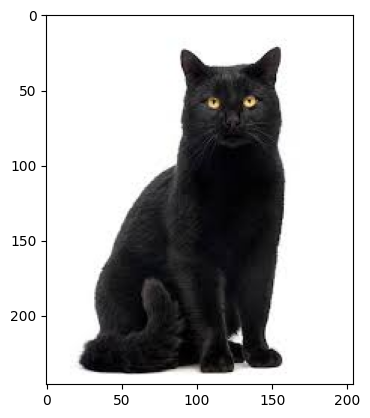

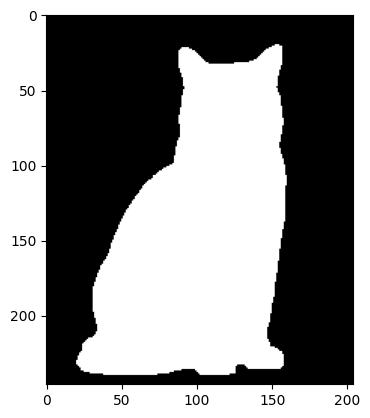

IOU for image is  0.9497321220591661


In [45]:
img0_path = img_paths[0]
img = get_img(img0_path)

seg_mask_img = edge_based_segmentation(img)
org_mask_img = read_true_mask(mask_paths[0])

print_IOU(seg_mask_img, org_mask_img)


In [ ]:
def print_IOU(seg_mask_img, org_mask_img):
    h,w = seg_mask_img.shape
    union = 0
    intersection = 0

    for i in range(0, h):
        for j in range(0,w):
            if org_mask_img[i][j]!=0 or seg_mask_img[i][j]!=0 :
                union+=1
            if org_mask_img[i][j]!=0 and seg_mask_img[i][j]!=0:
                intersection += 1
    
    iou = intersection/union

    print("IOU for image is ", iou)


In [ ]:
def print_pixel_accuracy(seg_mask_img, org_mask_img):
    h,w = seg_mask_img.shape
    correct_pixel = 0
    total_pixel = h*w

    for i in range(0, h):
        for j in range(0,w):
            if org_mask_img[i][j]!=0 and seg_mask_img[i][j]!=0:
                correct_pixel += 1
            if org_mask_img[i][j]==0 and seg_mask_img[i][j]==0:
                correct_pixel += 1
    
    accuracy = correct_pixel / total_pixel

    print("Pixel Accuracy for image  is ", accuracy)

In [ ]:
def print_f1_score(seg_mask_img, org_mask_img):
    h,w = seg_mask_img.shape
    overlap = 0

    pixel_1 = 0
    pixel_2 = 0

    for i in range(0, h):
        for j in range(0,w):
            if org_mask_img[i][j]!=0 and seg_mask_img[i][j]!=0 :
                overlap+=1
            if org_mask_img[i][j]!=0 :
                pixel_1 += 1
            if seg_mask_img[i][j]!=0:
                pixel_2 += 1
    
    f1 = 2*(overlap)/(pixel_2 + pixel_1)

    print("F1 score for image is ", f1)